# Importing libraries

In [665]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [666]:
df= pd.read_csv('../../data_eng/data/reporting_data/final_combined_data.csv')

# Data cleaning

In [667]:
# print(df.dtypes)

In [668]:
# check for nulls
df.isnull().sum()


employee_id                   0
name                          0
email                         0
password                      0
department                    0
created_at_x                  0
performance_score             0
enrollment_id                 0
course_id_x                   0
enrollment_date               0
completion_status             0
completion_percentage         0
completed_at                  0
score                         0
time_spent_x                  0
title                         0
description                   0
duration                      0
modules                       0
created_at_y                  0
tag                           0
imageUrl                      0
metric_id                     0
course_id_y                   0
completion_rate               0
average_score                 0
time_spent_y                  0
engagement_rate               0
average_time_to_completion    0
progress_rate                 0
recorded_at                   0
dtype: i

In [669]:
df.drop_duplicates(inplace=True)
print(len(df))

498798


 # DATA VISUALIZATION

Visualize performance_score, completion_percentage, and score.

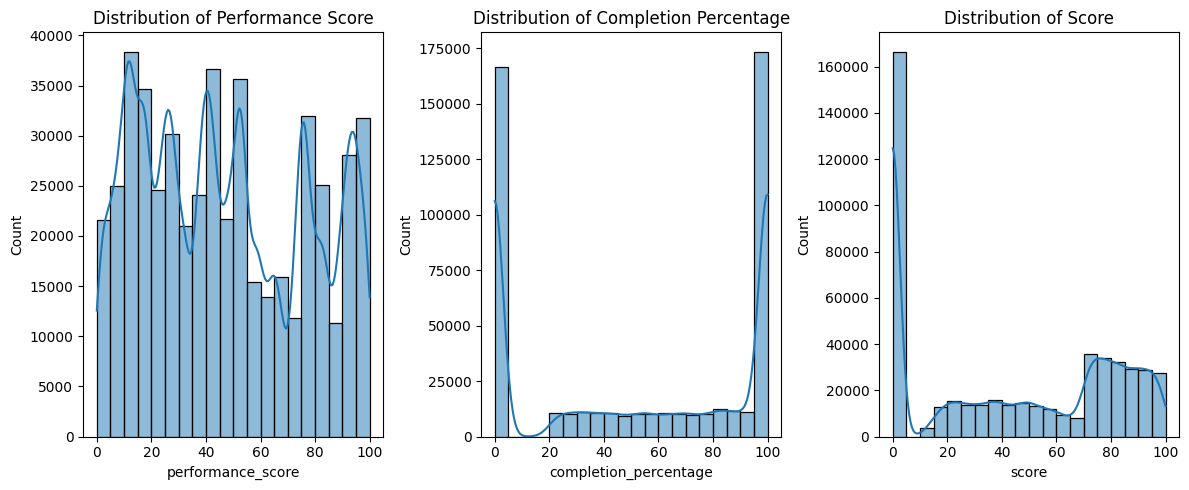

In [670]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['performance_score'], bins=20, kde=True)
plt.title('Distribution of Performance Score')

plt.subplot(1, 3, 2)
sns.histplot(df['completion_percentage'], bins=20, kde=True)
plt.title('Distribution of Completion Percentage')

plt.subplot(1, 3, 3)
sns.histplot(df['score'], bins=20, kde=True)
plt.title('Distribution of Score')

plt.tight_layout()
plt.show()


Performance Score by Department

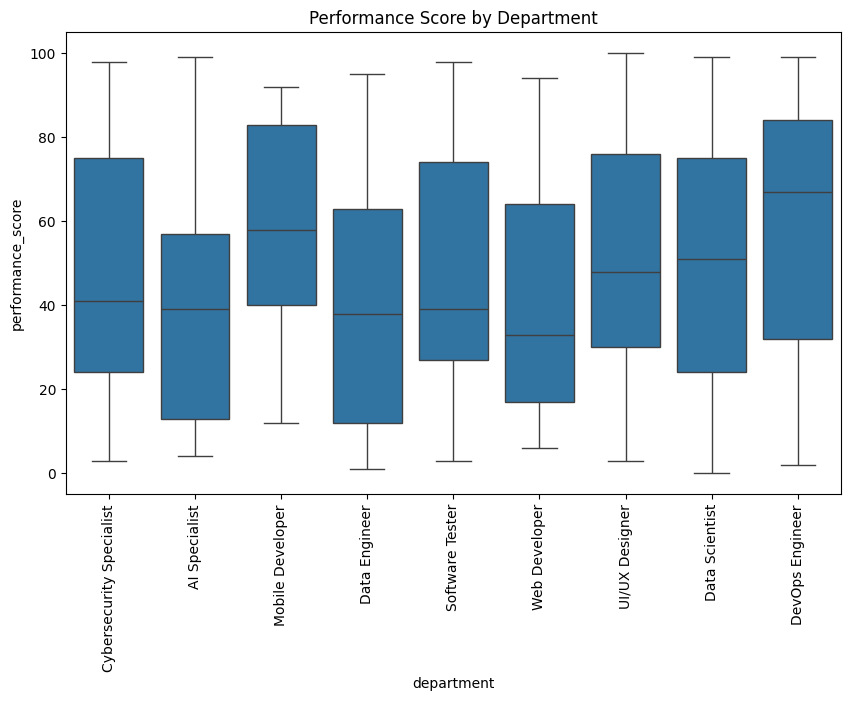

In [671]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='department', y='performance_score', data=df)
plt.title('Performance Score by Department')
plt.xticks(rotation=90)
plt.show()

Distribution of the performance score and time spent

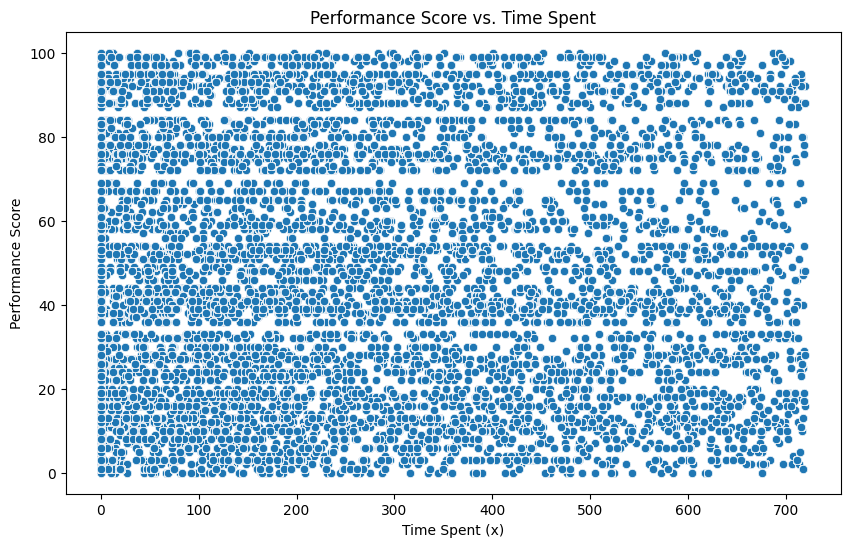

In [672]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='time_spent_x', y='performance_score', data=df)
plt.title('Performance Score vs. Time Spent')
plt.xlabel('Time Spent (x)')
plt.ylabel('Performance Score')
plt.show()




Completion status by department

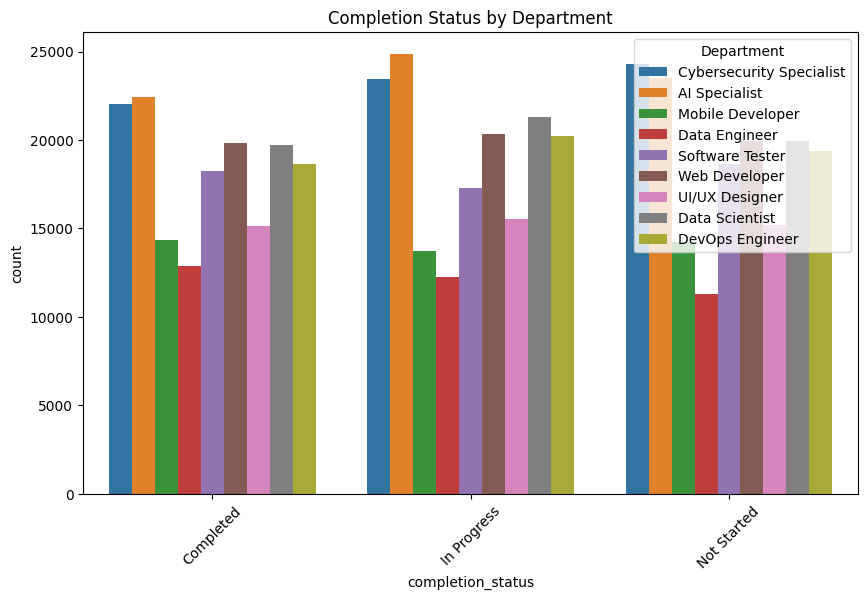

In [673]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='completion_status', hue='department')
plt.title('Completion Status by Department')
plt.xticks(rotation=45)
plt.legend(title='Department')
plt.show()


Box Plot: Average Score by Department

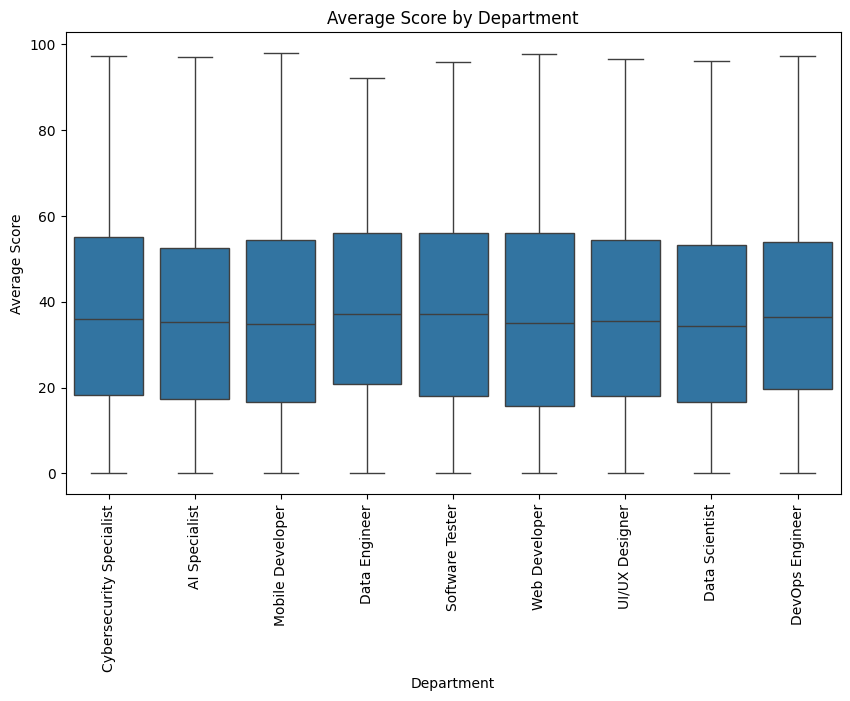

In [674]:
# 3. Box Plot: Average Score by Department
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='department', y='average_score')
plt.title('Average Score by Department')
plt.xlabel('Department')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.show()

Line Plot: Average Score Over Courses

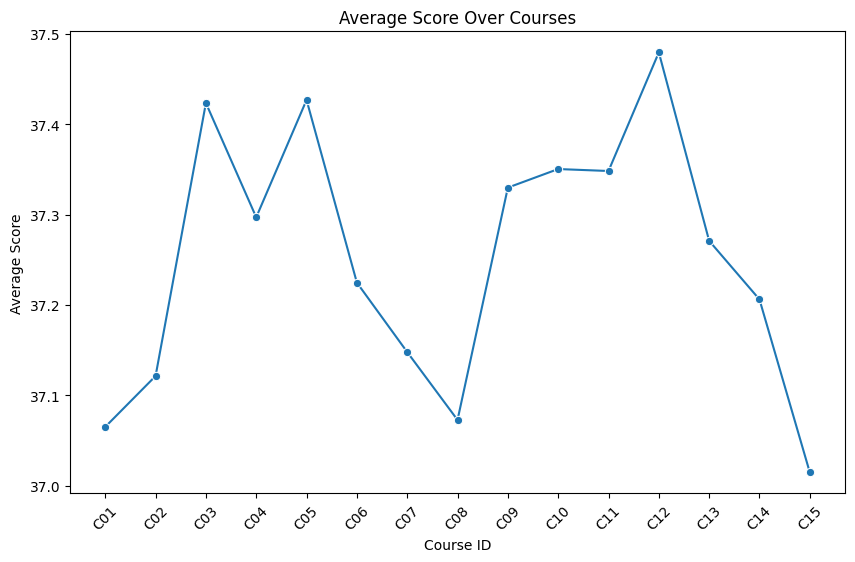

In [675]:

# 4. Line Plot: Average Score Over Courses
average_scores = df.groupby('course_id_x')['average_score'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_scores, x='course_id_x', y='average_score', marker='o')
plt.title('Average Score Over Courses')
plt.xlabel('Course ID')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

Feature Engineering

Feature selection

In [677]:
# Select relevant columns for table
reporting_columns = [
    'employee_id', 'name', 'department', 
    'course_id_x', 'title', 
    'completion_status', 'completion_percentage', 
    'average_score', 'time_spent_x','completion_rate','average_time_to_completion'
]

# Create a reporting table
df = df[reporting_columns]
df.head()

,employee_id,name,department,course_id_x,title,completion_status,completion_percentage,average_score,time_spent_x,completion_rate,average_time_to_completion
0,EMP001,Luke Parker,Cybersecurity Specialist,C05,Cloud Data Warehousing Solutions,Completed,100.0,52.426699,515.06241,60.194685,23.622939
1,EMP001,Luke Parker,Cybersecurity Specialist,C05,Cloud Data Warehousing Solutions,Completed,100.0,8.557754,515.06241,13.707477,1.095855
2,EMP001,Luke Parker,Cybersecurity Specialist,C05,Cloud Data Warehousing Solutions,Completed,100.0,38.140561,515.06241,41.300585,43.108445
3,EMP001,Luke Parker,Cybersecurity Specialist,C05,Cloud Data Warehousing Solutions,Completed,100.0,29.597581,515.06241,35.860451,15.007926
4,EMP001,Luke Parker,Cybersecurity Specialist,C05,Cloud Data Warehousing Solutions,Completed,100.0,26.926925,515.06241,39.704233,17.627583


In [678]:
df.drop_duplicates()
len(df)

498798

# Feature extraction

 Calculate average completion time per course

In [679]:
# Calculate average completion time per course
average_completion_time = df.groupby('course_id_x').agg(
    expected_time_to_complete=('time_spent_x', 'mean')
).reset_index()

# Merge the average completion time back into the reporting table
df = df.merge(average_completion_time, on='course_id_x', how='left')
df.head()

,employee_id,name,department,course_id_x,title,completion_status,completion_percentage,average_score,time_spent_x,completion_rate,average_time_to_completion,expected_time_to_complete
0,EMP001,Luke Parker,Cybersecurity Specialist,C05,Cloud Data Warehousing Solutions,Completed,100.0,52.426699,515.06241,60.194685,23.622939,207.938868
1,EMP001,Luke Parker,Cybersecurity Specialist,C05,Cloud Data Warehousing Solutions,Completed,100.0,8.557754,515.06241,13.707477,1.095855,207.938868
2,EMP001,Luke Parker,Cybersecurity Specialist,C05,Cloud Data Warehousing Solutions,Completed,100.0,38.140561,515.06241,41.300585,43.108445,207.938868
3,EMP001,Luke Parker,Cybersecurity Specialist,C05,Cloud Data Warehousing Solutions,Completed,100.0,29.597581,515.06241,35.860451,15.007926,207.938868
4,EMP001,Luke Parker,Cybersecurity Specialist,C05,Cloud Data Warehousing Solutions,Completed,100.0,26.926925,515.06241,39.704233,17.627583,207.938868


Calculate additional metrics

In [680]:


# Calculate additional metrics
df_grouped = df.groupby(
    ['employee_id','name' ,'department', 'course_id_x', 'title']
).agg(
    average_completion_percentage=('completion_percentage', 'mean'),
    average_time_to_completion=('time_spent_x', 'mean'),  # Average time taken per course
    expected_time_to_complete=('expected_time_to_complete', 'mean')  # Adding expected time to complete
).reset_index()

df = df_grouped.merge(df[['employee_id', 'course_id_x', 'average_score']], on=['employee_id', 'course_id_x'], how='left')
df.head(30)

,employee_id,name,department,course_id_x,title,average_completion_percentage,average_time_to_completion,expected_time_to_complete,average_score
0,EMP001,Luke Parker,Cybersecurity Specialist,C01,User Research and Testing Methods,40.844654,219.707911,192.894907,52.426699
1,EMP001,Luke Parker,Cybersecurity Specialist,C01,User Research and Testing Methods,40.844654,219.707911,192.894907,8.557754
2,EMP001,Luke Parker,Cybersecurity Specialist,C01,User Research and Testing Methods,40.844654,219.707911,192.894907,38.140561
3,EMP001,Luke Parker,Cybersecurity Specialist,C01,User Research and Testing Methods,40.844654,219.707911,192.894907,29.597581
4,EMP001,Luke Parker,Cybersecurity Specialist,C01,User Research and Testing Methods,40.844654,219.707911,192.894907,26.926925
5,EMP001,Luke Parker,Cybersecurity Specialist,C01,User Research and Testing Methods,40.844654,219.707911,192.894907,2.420975
6,EMP001,Luke Parker,Cybersecurity Specialist,C01,User Research and Testing Methods,40.844654,219.707911,192.894907,31.631957
7,EMP001,Luke Parker,Cybersecurity Specialist,C01,User Research and Testing Methods,40.844654,219.707911,192.894907,74.252102
8,EMP001,Luke Parker,Cybersecurity Specialist,C01,User Research and Testing Methods,40.844654,219.707911,192.894907,62.175682
9,EMP001,Luke Parker,Cybersecurity Specialist,C01,User Research and Testing Methods,40.844654,219.707911,192.894907,50.327477


In [681]:


df = df.groupby(['employee_id', 'name','course_id_x','title','average_completion_percentage','average_time_to_completion','expected_time_to_complete']).agg(
    average_score=('average_score', lambda x: np.random.choice(x))
).reset_index()

df.head(20)


,employee_id,name,course_id_x,title,average_completion_percentage,average_time_to_completion,expected_time_to_complete,average_score
0,EMP001,Luke Parker,C01,User Research and Testing Methods,40.844654,219.707911,192.894907,62.175682
1,EMP001,Luke Parker,C03,Full-Stack Web Development,91.399224,319.252530,200.163372,30.583535
2,EMP001,Luke Parker,C04,Introduction to Artificial Intelligence,53.374212,265.343207,191.338438,8.557754
3,EMP001,Luke Parker,C05,Cloud Data Warehousing Solutions,100.000000,515.062410,207.938868,62.773396
4,EMP001,Luke Parker,C06,Continuous Integration and Continuous Deployme...,15.884567,6.406210,180.773875,52.965297
5,EMP001,Luke Parker,C07,Deep Learning with TensorFlow,54.681747,295.581872,184.851581,74.279015
6,EMP001,Luke Parker,C08,Automation Testing with Selenium,0.000000,0.000000,189.566504,17.134000
7,EMP001,Luke Parker,C09,Cybersecurity Fundamentals,9.205170,55.565290,192.986563,8.984868
8,EMP001,Luke Parker,C10,Machine Learning Fundamentals,41.177551,91.078129,180.657017,24.183614
9,EMP001,Luke Parker,C11,iOS App Development with Swift,40.641081,57.451197,186.664843,1.682032


In [682]:
# Rename columns for clarity
df.rename(columns={
    'average_completion_percentage': 'Average Completion Percentage',
    'average_score': 'Average Score',
    'average_time_to_completion': 'Average Time to Completion',
    'expected_time_to_complete': 'Expected Time to Complete'
}, inplace=True)

# Save the reporting table to a CSV file
# df.to_csv('../../data/reporting_data/df.csv', index=False)

# Display the reporting table

df.head()


,employee_id,name,course_id_x,title,Average Completion Percentage,Average Time to Completion,Expected Time to Complete,Average Score
0,EMP001,Luke Parker,C01,User Research and Testing Methods,40.844654,219.707911,192.894907,62.175682
1,EMP001,Luke Parker,C03,Full-Stack Web Development,91.399224,319.252530,200.163372,30.583535
2,EMP001,Luke Parker,C04,Introduction to Artificial Intelligence,53.374212,265.343207,191.338438,8.557754
3,EMP001,Luke Parker,C05,Cloud Data Warehousing Solutions,100.000000,515.062410,207.938868,62.773396
4,EMP001,Luke Parker,C06,Continuous Integration and Continuous Deployme...,15.884567,6.406210,180.773875,52.965297


Calculating the completion rate

In [683]:

df['Completion Rate'] = df['Expected Time to Complete'] / df['Average Time to Completion']

# Optionally, handle any potential division by zero
df['Completion Rate'] = df['Completion Rate'].replace([np.inf, -np.inf], np.nan)

In [684]:
df.head()

,employee_id,name,course_id_x,title,Average Completion Percentage,Average Time to Completion,Expected Time to Complete,Average Score,Completion Rate
0,EMP001,Luke Parker,C01,User Research and Testing Methods,40.844654,219.707911,192.894907,62.175682,0.877961
1,EMP001,Luke Parker,C03,Full-Stack Web Development,91.399224,319.252530,200.163372,30.583535,0.626975
2,EMP001,Luke Parker,C04,Introduction to Artificial Intelligence,53.374212,265.343207,191.338438,8.557754,0.721098
3,EMP001,Luke Parker,C05,Cloud Data Warehousing Solutions,100.000000,515.062410,207.938868,62.773396,0.403716
4,EMP001,Luke Parker,C06,Continuous Integration and Continuous Deployme...,15.884567,6.406210,180.773875,52.965297,28.218536


Correlation matrix

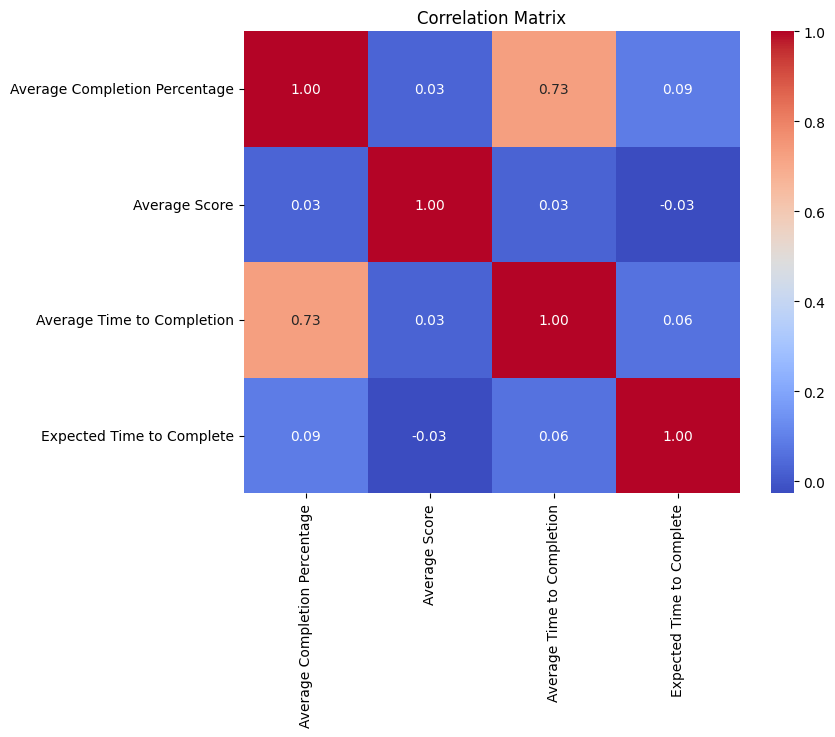

In [685]:
correlation_matrix = df[['Average Completion Percentage', 'Average Score', 'Average Time to Completion', 'Expected Time to Complete']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Calculate performance score and normalizing it

In [686]:
df['course_title'] = df['course_id_x'].astype(str) + ' - ' + df['title']
# Calculate the Performance Score
df['Performance_Score'] = df['Average Completion Percentage'] * df['Average Score']


# Calculate the mean of the Normalized Performance Score
mean_score = df['Performance_Score'].mean()

# Replace 0 values with the mean score
df['Performance_Score'] = df['Performance_Score'].replace(0, mean_score)

# Normalize the Performance Score
# Method: Min-Max Normalization
min_score = df['Performance_Score'].min()
max_score = df['Performance_Score'].max()

df['Normalized_Performance_Score'] = (df['Performance_Score'] - min_score) / (max_score - min_score)

# Display the updated DataFrame
df.head()


,employee_id,name,course_id_x,title,Average Completion Percentage,Average Time to Completion,Expected Time to Complete,Average Score,Completion Rate,course_title,Performance_Score,Normalized_Performance_Score
0,EMP001,Luke Parker,C01,User Research and Testing Methods,40.844654,219.707911,192.894907,62.175682,0.877961,C01 - User Research and Testing Methods,2539.544203,0.264857
1,EMP001,Luke Parker,C03,Full-Stack Web Development,91.399224,319.252530,200.163372,30.583535,0.626975,C03 - Full-Stack Web Development,2795.311384,0.291541
2,EMP001,Luke Parker,C04,Introduction to Artificial Intelligence,53.374212,265.343207,191.338438,8.557754,0.721098,C04 - Introduction to Artificial Intelligence,456.763358,0.047564
3,EMP001,Luke Parker,C05,Cloud Data Warehousing Solutions,100.000000,515.062410,207.938868,62.773396,0.403716,C05 - Cloud Data Warehousing Solutions,6277.339592,0.654816
4,EMP001,Luke Parker,C06,Continuous Integration and Continuous Deployme...,15.884567,6.406210,180.773875,52.965297,28.218536,C06 - Continuous Integration and Continuous De...,841.330784,0.087685


In [687]:

# Step 1: Find the minimum Normalized_Performance_Score for each employee
min_scores = df.groupby('employee_id')['Normalized_Performance_Score'].min().reset_index()
min_scores.rename(columns={'Normalized_Performance_Score': 'Min_Normalized_Performance_Score'}, inplace=True)

# Step 2: Merge this back to the original DataFrame to filter for the least score
df = df.merge(min_scores, on='employee_id')

# Step 3: Filter to find course titles with the least score
df['Target_Courses'] = df.apply(
    lambda row: row['course_title'] if row['Normalized_Performance_Score'] == row['Min_Normalized_Performance_Score'] else None, 
    axis=1
)

# Step 4: Group by employee_id to aggregate course titles into a list
target_courses = df.groupby('employee_id')['Target_Courses'].apply(lambda x: list(filter(None, x))).reset_index()

# Step 5: Merge the target courses back into the original DataFrame or create a new column
df = df.merge(target_courses, on='employee_id', how='left')

# Rename the column for clarity
df.rename(columns={'Target_Courses_y': 'Assigned_Courses'}, inplace=True)

# Display the updated DataFrame with assigned courses
df.head()


,employee_id,name,course_id_x,title,Average Completion Percentage,Average Time to Completion,Expected Time to Complete,Average Score,Completion Rate,course_title,Performance_Score,Normalized_Performance_Score,Min_Normalized_Performance_Score,Target_Courses_x,Assigned_Courses
0,EMP001,Luke Parker,C01,User Research and Testing Methods,40.844654,219.707911,192.894907,62.175682,0.877961,C01 - User Research and Testing Methods,2539.544203,0.264857,0.007043,None,[C11 - iOS App Development with Swift]
1,EMP001,Luke Parker,C03,Full-Stack Web Development,91.399224,319.252530,200.163372,30.583535,0.626975,C03 - Full-Stack Web Development,2795.311384,0.291541,0.007043,None,[C11 - iOS App Development with Swift]
2,EMP001,Luke Parker,C04,Introduction to Artificial Intelligence,53.374212,265.343207,191.338438,8.557754,0.721098,C04 - Introduction to Artificial Intelligence,456.763358,0.047564,0.007043,None,[C11 - iOS App Development with Swift]
3,EMP001,Luke Parker,C05,Cloud Data Warehousing Solutions,100.000000,515.062410,207.938868,62.773396,0.403716,C05 - Cloud Data Warehousing Solutions,6277.339592,0.654816,0.007043,None,[C11 - iOS App Development with Swift]
4,EMP001,Luke Parker,C06,Continuous Integration and Continuous Deployme...,15.884567,6.406210,180.773875,52.965297,28.218536,C06 - Continuous Integration and Continuous De...,841.330784,0.087685,0.007043,None,[C11 - iOS App Development with Swift]


Taking required columns

In [688]:
required_columns=[
    'employee_id', 'course_id_x', 'course_title', 
    'Normalized_Performance_Score' , 'Min_Normalized_Performance_Score',
    'Assigned_Courses'
]

df_final=df[required_columns]
df_final.head(30)

,employee_id,course_id_x,course_title,Normalized_Performance_Score,Min_Normalized_Performance_Score,Assigned_Courses
0,EMP001,C01,C01 - User Research and Testing Methods,0.264857,0.007043,[C11 - iOS App Development with Swift]
1,EMP001,C03,C03 - Full-Stack Web Development,0.291541,0.007043,[C11 - iOS App Development with Swift]
2,EMP001,C04,C04 - Introduction to Artificial Intelligence,0.047564,0.007043,[C11 - iOS App Development with Swift]
3,EMP001,C05,C05 - Cloud Data Warehousing Solutions,0.654816,0.007043,[C11 - iOS App Development with Swift]
4,EMP001,C06,C06 - Continuous Integration and Continuous De...,0.087685,0.007043,[C11 - iOS App Development with Swift]
5,EMP001,C07,C07 - Deep Learning with TensorFlow,0.423662,0.007043,[C11 - iOS App Development with Swift]
6,EMP001,C08,C08 - Automation Testing with Selenium,0.209233,0.007043,[C11 - iOS App Development with Swift]
7,EMP001,C09,C09 - Cybersecurity Fundamentals,0.008539,0.007043,[C11 - iOS App Development with Swift]
8,EMP001,C10,C10 - Machine Learning Fundamentals,0.103803,0.007043,[C11 - iOS App Development with Swift]
9,EMP001,C11,C11 - iOS App Development with Swift,0.007043,0.007043,[C11 - iOS App Development with Swift]


In [689]:
df_final.columns

Index(['employee_id', 'course_id_x', 'course_title',
       'Normalized_Performance_Score', 'Min_Normalized_Performance_Score',
       'Assigned_Courses'],
      dtype='object')

In [690]:



# Function to drop 3 random rows while keeping all columns
def drop_random_rows(group):
    # Check if there are more than 3 rows to drop
    if len(group) > 3:
        return group.sample(n=len(group) - 3)  # Sample all but 3 rows
    else:
        return group  # Return the group as is if 3 or fewer rows

# Group by 'employee_id' and apply the function
df_final_reduced = df_final.groupby('employee_id', group_keys=False).apply(drop_random_rows)

# Reset the index if necessary
df_final_reduced.reset_index(drop=True, inplace=True)

# Display the result
df_final_reduced.head(30)


C:\Users\VishalAnsari\AppData\Local\Temp\ipykernel_3000\467087793.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_final_reduced = df_final.groupby('employee_id', group_keys=False).apply(drop_random_rows)


,employee_id,course_id_x,course_title,Normalized_Performance_Score,Min_Normalized_Performance_Score,Assigned_Courses
0,EMP001,C15,C15 - Ethical Hacking Techniques,0.259614,0.007043,[C11 - iOS App Development with Swift]
1,EMP001,C07,C07 - Deep Learning with TensorFlow,0.423662,0.007043,[C11 - iOS App Development with Swift]
2,EMP001,C09,C09 - Cybersecurity Fundamentals,0.008539,0.007043,[C11 - iOS App Development with Swift]
3,EMP001,C01,C01 - User Research and Testing Methods,0.264857,0.007043,[C11 - iOS App Development with Swift]
4,EMP001,C12,C12 - Prototyping with Figma,0.206106,0.007043,[C11 - iOS App Development with Swift]
5,EMP001,C10,C10 - Machine Learning Fundamentals,0.103803,0.007043,[C11 - iOS App Development with Swift]
6,EMP001,C14,C14 - Network Security and Firewalls,0.559934,0.007043,[C11 - iOS App Development with Swift]
7,EMP001,C13,C13 - Data Pipeline Development,0.081813,0.007043,[C11 - iOS App Development with Swift]
8,EMP001,C05,C05 - Cloud Data Warehousing Solutions,0.654816,0.007043,[C11 - iOS App Development with Swift]
9,EMP001,C06,C06 - Continuous Integration and Continuous De...,0.087685,0.007043,[C11 - iOS App Development with Swift]


In [692]:
df_final_reduced.to_csv('../data/output/df_final_reduced.csv', index=False)